_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [4]:
type(result)

requests.models.Response

In [5]:
type(result.text)

str

In [8]:
soup = bs4.BeautifulSoup(result.text)
type(soup)

bs4.BeautifulSoup

In [9]:
first = soup.select('h2')[0]
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [10]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [11]:
titles = [tag.text.strip() for tag in soup.select('h2')]
titles[0], titles[-1]

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [12]:
long_titles = []
for title in titles:
  if len(title) > 80:
    long_titles.append(title)
    
long_titles    

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [13]:
[title for title in titles
 if len(title) > 80]

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [14]:
def long(title):
  return len(title) > 80

long("Python woo woo")

False

In [17]:
long("Python woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo woo")

True

In [18]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [19]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [21]:
pd_df = pd.DataFrame({"title": titles})
pd_df.shape

(95, 1)

In [22]:
pd_df[ pd_df["title"].str.len() > 80]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [23]:
condition = pd_df["title"].str.len() > 80
pd_df[condition]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
pd_df["title length"] = pd_df["title"].apply(len)

In [25]:
pd_df.shape

(95, 2)

In [26]:
pd_df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [27]:
pd_df[ pd_df["title length"] > 80]

,title,title length
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
48,Lessons learned from building a community of Python users among thousands of analysts,85
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
66,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [28]:
pd_df.loc[ pd_df["title length"] > 80, "title"]

30          ¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38                  Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43                 How to engage Python contributors in the long term? Tech is easy, people are hard.
48              Lessons learned from building a community of Python users among thousands of analysts
50                 Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting
60    One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.
66                 Put down the deep learning: When not to use neural networks and what to do instead
84         Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline
Name: title, dtype: object

### long title

In [29]:
pd_df["long title"] = pd_df["title length"] > 80
pd_df.shape

(95, 3)

In [31]:
pd_df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [32]:
pd_df[ pd_df["long title"]==True]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


In [34]:
pd_df[pd_df["long title"]]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [0]:
pd_df["first letter"] = pd_df["title"].str[0]

In [36]:
pd_df[ pd_df["first letter"] =="P"]

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [38]:
pd_df[ pd_df["title"].str.startswith("P")]

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [39]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 7.7MB/s 


In [0]:
import textstat

In [0]:
pd_df["title word count"] = pd_df["title"].apply(textstat.lexicon_count)

In [42]:
pd_df.shape


(95, 5)

In [43]:
pd_df.head()

,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [44]:
pd_df[ pd_df["title word count"] <= 3]

,title,title length,long title,first letter,title word count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
pd_df = pd_df.rename(columns={"title length": "title character count"})

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [46]:
pd_df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [47]:
pd_df.sort_values(by="title character count").head()


,title,title character count,long title,first letter,title word count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


Titles sorted reverse alphabetically

In [48]:
pd_df.sort_values(by="first letter", ascending=False).head()

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [49]:
pd_df["first letter"].value_counts()

T    12
A    11
M     8
P     8
E     7
B     6
S     6
H     5
W     4
G     4
D     4
L     4
F     3
C     3
R     2
I     2
8     1
5     1
¡     1
O     1
U     1
t     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [50]:
pd_df["long title"].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

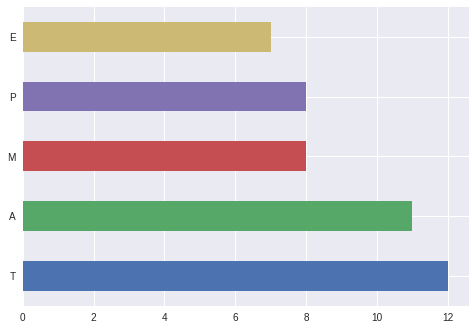

In [51]:
pd_df["first letter"].value_counts().head().plot.barh()

Histogram of title lengths, in characters

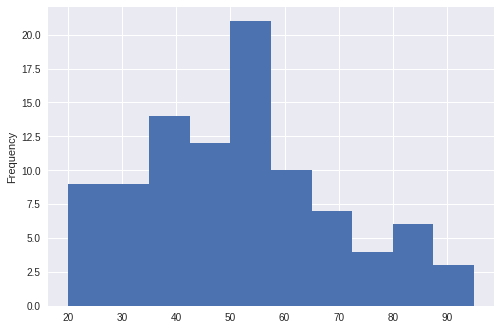

In [53]:
pd_df["title character count"].plot.hist();

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [54]:
# scraping talk descriptions

len(soup.select(".presentation-description"))

95

In [55]:
# makes sense if there are 95 talk titles


# check out what we are working with

first = soup.select(".presentation-description")[0]
first

<div class="presentation-description">Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.</div>

In [57]:
type(first)

bs4.element.Tag

In [56]:
# clean up the description

first.text.strip()

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [0]:
# clean up all descriptions

descriptions = []
for tag in soup.select(".presentation-description"):
  description = tag.text.strip()
  descriptions.append(description)
 

In [59]:
type(descriptions), len(descriptions)

(list, 95)

In [62]:
# "descriptions" looks right
# turn this into a pandas dataframe

desc_df = pd.DataFrame({"description": descriptions})
desc_df.head()

,description
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe..."
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ..."
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa..."
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat..."


In [64]:
# adding column for character count

desc_df["character count"] = desc_df["description"].apply(len)
desc_df.head()

,description,character count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647


In [65]:
# adding column for word count
# textstat imported above

desc_df["word count"] = desc_df["description"].apply(textstat.lexicon_count)
desc_df.head()

,description,character count,word count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96


In [67]:
#Describe all the dataframe's columns. What's the average description word count? The minimum? The maximum?

desc_df.describe(include="all")

,description,character count,word count
count,95,95.000000,95.000000
unique,95,NaN,NaN
top,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",NaN,NaN
freq,1,NaN,NaN
mean,NaN,813.073684,130.821053
std,NaN,415.988191,64.357872
min,NaN,121.000000,20.000000
25%,NaN,542.500000,85.500000
50%,NaN,718.000000,116.000000
75%,NaN,1016.500000,165.000000


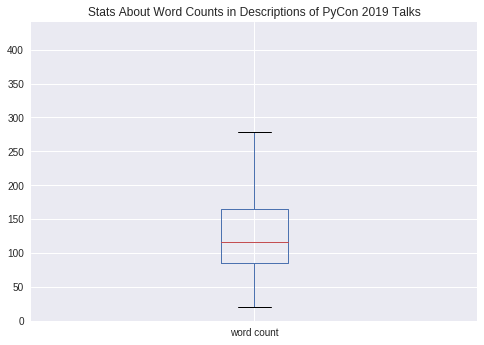

In [72]:
# box plot to show stats for word count

title = "Stats About Word Counts in Descriptions of PyCon 2019 Talks"
desc_df["word count"].plot.box(title=title);

In [83]:
#Answer the question: Which descriptions could fit in a tweet?

# Assuming a tweet can have up to 280 characters

desc_df["tweetable"] = desc_df["character count"] <= 280
desc_df[ desc_df["tweetable"]==True]

,description,character count,word count,tweetable
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20,True


In [74]:
# percentage of descriptions that can fit in a tweet

desc_df["tweetable"].value_counts(normalize=True)

False    0.989474
True     0.010526
Name: tweetable, dtype: float64

In [85]:
# Make another new column in the dataframe:
# description grade level (you can use this textstat function to get the Flesh-Kincaid grade level)

desc_df["grade level"] = desc_df["description"].apply(textstat.flesch_kincaid_grade)
desc_df.head()

,description,character count,word count,tweetable,grade level
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135,False,14.1
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,False,10.7
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,False,8.5
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84,False,17.3
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96,False,10.8


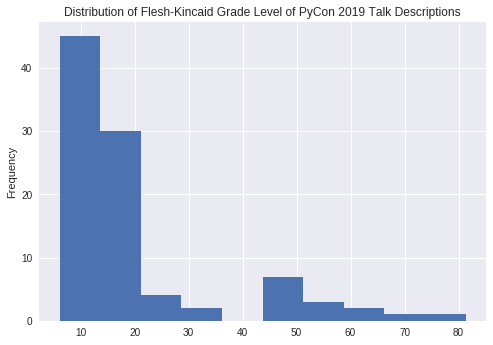

In [86]:
# What's the distribution of grade levels? Plot a histogram.

title = "Distribution of Flesh-Kincaid Grade Level of PyCon 2019 Talk Descriptions"
desc_df["grade level"].plot.hist(title=title);

In [87]:
desc_df["grade level"].describe()

count    95.000000
mean     20.084211
std      15.719485
min       6.100000
25%      11.100000
50%      14.100000
75%      17.850000
max      81.300000
Name: grade level, dtype: float64

In [0]:
# Not sure what 81st grade is but it sounds hard.
# Looking at what can be adjusted to get more accurate results.